<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week5/FE_Notebook5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 5.4: Experiment with KNN*




# Example I: Classifying Social Networks Ads

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

dataset = pd.read_csv('https://raw.githubusercontent.com/falawar7/AAI614_ELAWAR/main/Week5/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting K-NN to the Training set

Use the KNN model for training by specifying the input and output variables of the training set as follows.  Note that *p =2* refers to **euclidean distance**.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [7]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

# Example II: Classifying Digits

In [9]:
from sklearn import metrics

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [11]:
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [12]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(x_test))
score = model.score(x_test, y_test)

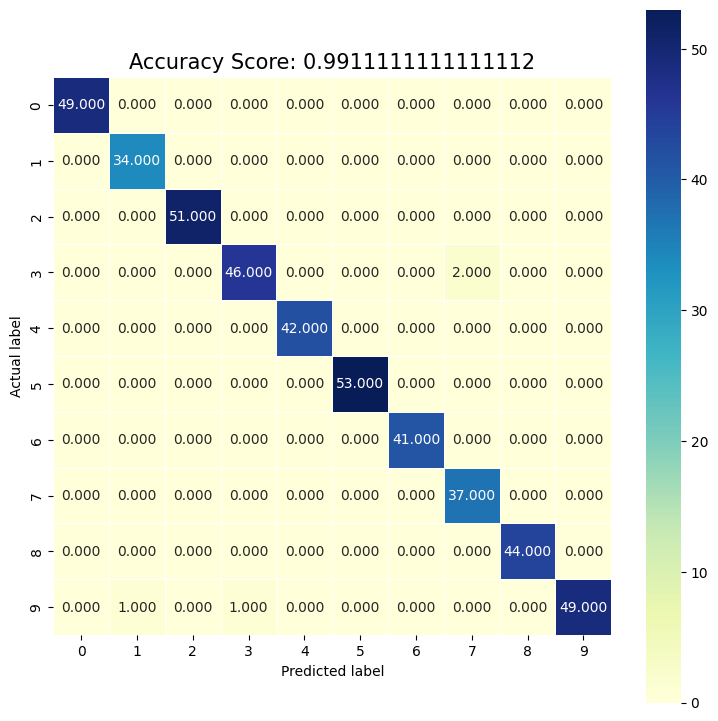

In [14]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Example on My Own Daatset **


In [15]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/falawar7/AAI614_ELAWAR/main/Week5/diabetes.csv')

In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X= diabetes.drop('Outcome',axis=1)
y= diabetes['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [47]:
model = KNeighborsClassifier(n_neighbors=20, metric = 'minkowski', p = 2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [48]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))
score = model.score(X_test, y_test)

In [49]:
score

0.7552083333333334

In [50]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

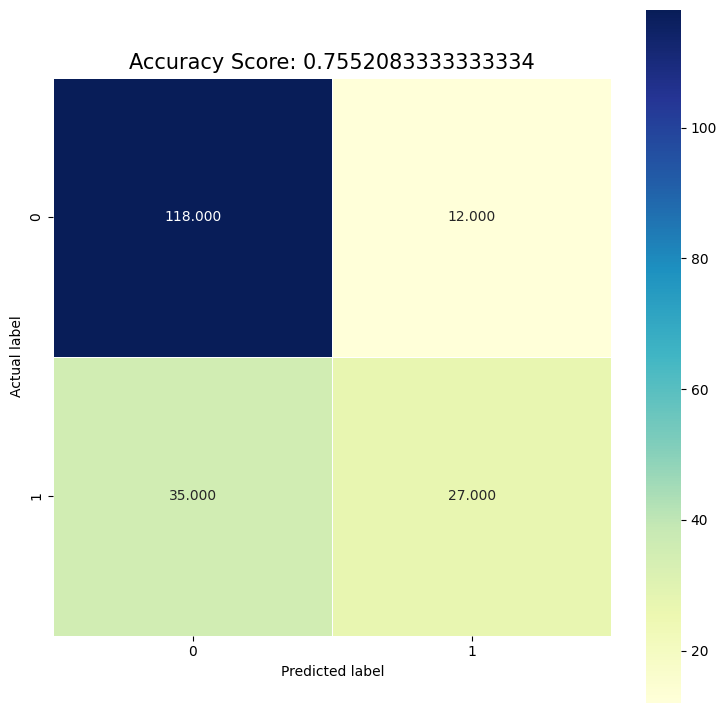

In [53]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

RandomSerachCV

In [67]:
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [61]:
diabetes2 = pd.read_csv('https://raw.githubusercontent.com/falawar7/AAI614_ELAWAR/main/Week5/diabetes.csv')

In [62]:
X2= diabetes.drop('Outcome',axis=1)
y2= diabetes['Outcome']

In [152]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 0)

In [153]:
model2 = KNeighborsClassifier()


In [154]:
params = {
    'n_neighbors': np.arange(20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan',],
}

In [162]:
random_search = RandomizedSearchCV(estimator=model2, param_distributions=params, n_iter=100, cv=5, random_state=0, n_jobs=-1)

In [163]:
random_search.fit(X2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, i

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [164]:
best_params = random_search.best_params_
best_params

{'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan'}

In [165]:
y2_pred = random_search.predict(X2_test)

In [166]:
acc_score2 = accuracy_score(y2_test, y2_pred)
print('Accuracy score: ', acc_score2)

Accuracy score:  0.78125


In [148]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2_test, y2_pred)
cm2

array([[118,  12],
       [ 34,  28]])

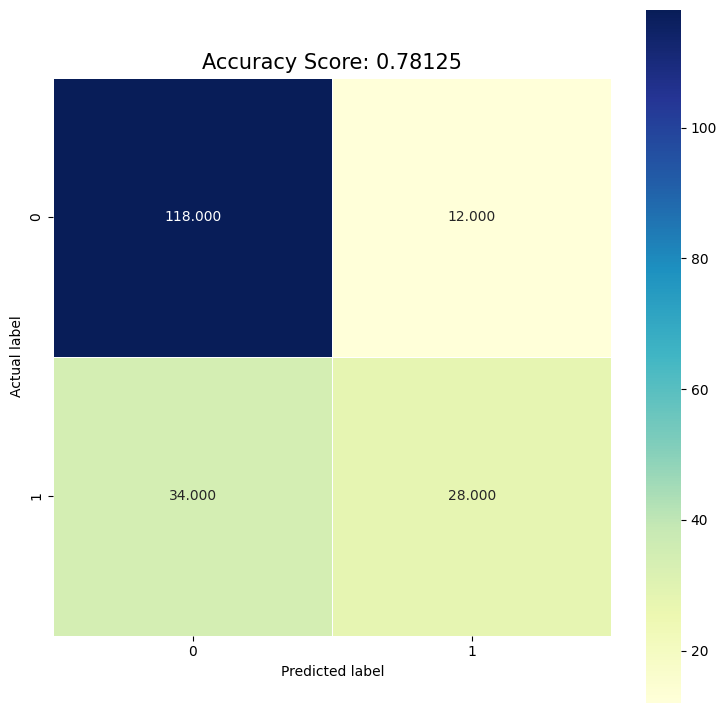

In [167]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score2)
plt.title(all_sample_title, size = 15);

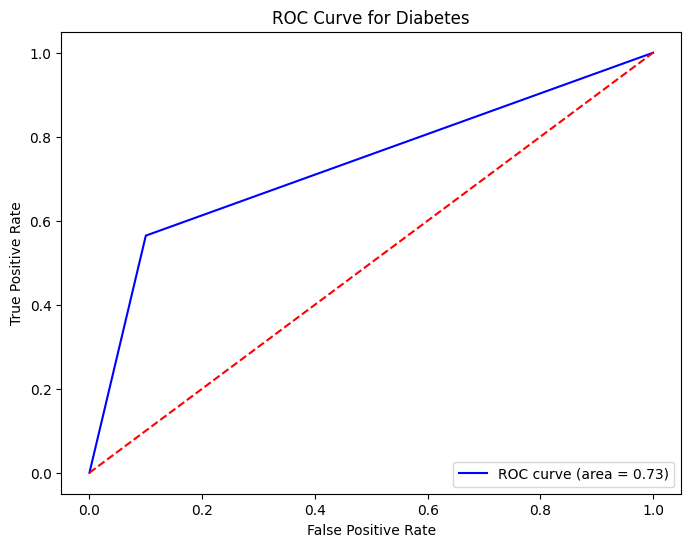

In [91]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes')
plt.legend(loc='lower right')
plt.show()

In [168]:
print(X2.isnull().sum())
print(y2.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
0


Getting Better Results

In [170]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [204]:
params= {
    'n_neighbors': [-1,1,3 ,5, 7,10,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30, 40, 50,60]
}

In [205]:
model3 = KNeighborsClassifier()
random_search2 = RandomizedSearchCV(knn, param_distributions=params, n_iter=100, cv=5, random_state=0, verbose=2)

In [206]:
random_search2= random_search2.fit(X2_train_scaled, y2_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END leaf_size=60, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=60, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=60, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=60, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=60, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=-1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=-1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=-1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=-1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=-1, weights=uniform; total time=   0.0s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [207]:
print(f"Best Hyperparameters: {random_search2.best_params_}")
best_model = random_search2.best_estimator_
test_accuracy = best_model.score(X2_test_scaled, y2_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'leaf_size': 50}
Test accuracy: 0.7760


In [208]:
y2_pred = best_model.predict(X2_test_scaled)

In [209]:
cm3= confusion_matrix(y2_test,y2_pred)
cm3

array([[118,  12],
       [ 31,  31]])

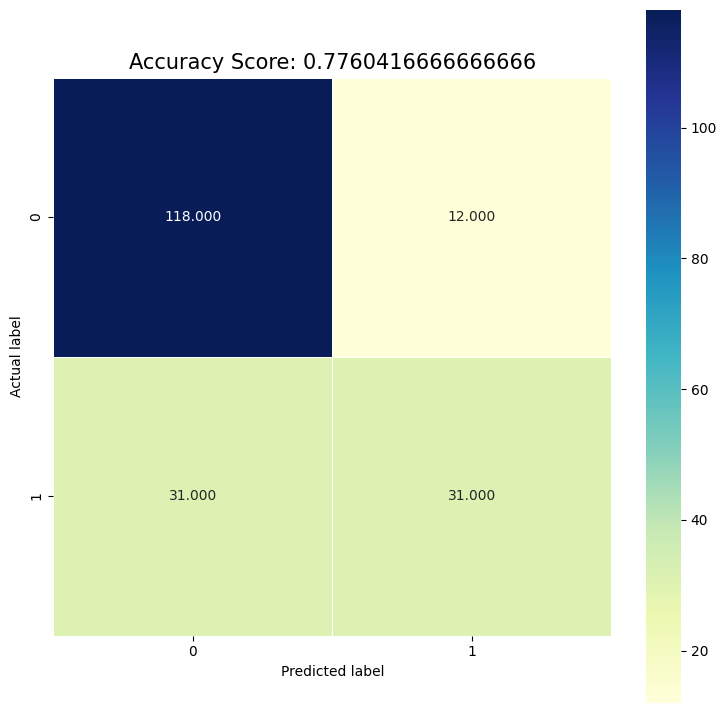

In [210]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15);

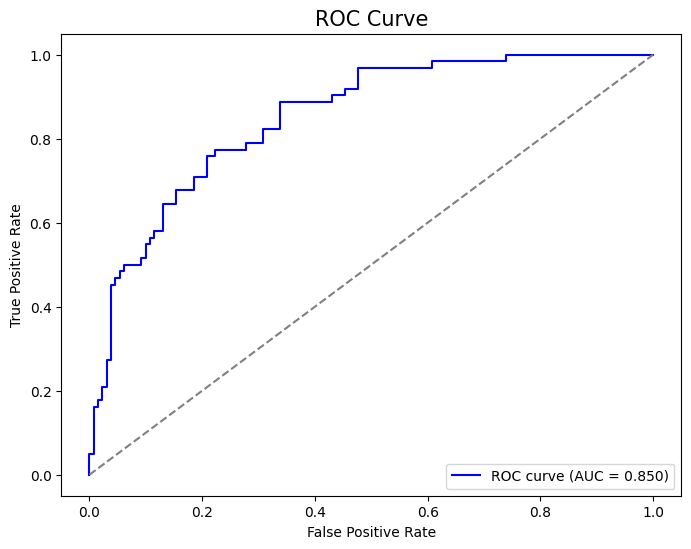

In [211]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y2_test, best_model.predict_proba(X2_test_scaled)[:, 1])
roc_auc = roc_auc_score(y2_test, best_model.predict_proba(X2_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend(loc="lower right")
plt.show()